In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns


%matplotlib inline

In [3]:
dfmpg = sns.load_dataset('mpg')
dfmpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [7]:
dfmpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
dfmpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
dfmpg[dfmpg['mpg'] == dfmpg['mpg'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc


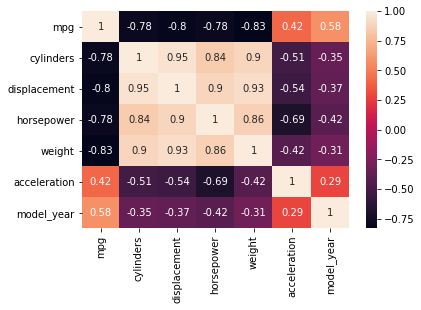

In [11]:
sns.heatmap(dfmpg.corr(), annot=True)

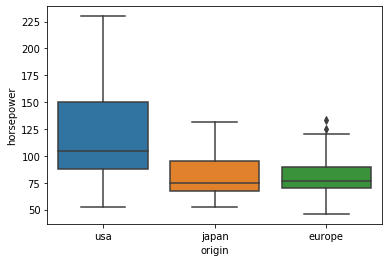

In [12]:
sns.boxplot(x='origin', y='horsepower', data=dfmpg)

user_input:
weight = 5000
horsepower = 50
displacement = 300
cylinders = 6

--------------
mpg = 30

In [18]:
origin = dfmpg.groupby('origin')
origin_hp = origin.describe()['horsepower']

In [20]:
iqr = origin_hp.iloc[0,6] - origin_hp.iloc[0,4]
iqr

20.25

In [25]:
upper_bound = origin_hp.iloc[0,6] + 1.5*iqr
lower_bound = origin_hp.iloc[0,4] - 1.5*iqr

In [27]:
dfmpg[(dfmpg['origin']=='europe') & (dfmpg['horsepower']>upper_bound)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
275,17.0,6,163.0,125.0,3140,13.6,78,europe,volvo 264gl
277,16.2,6,163.0,133.0,3410,15.8,78,europe,peugeot 604sl


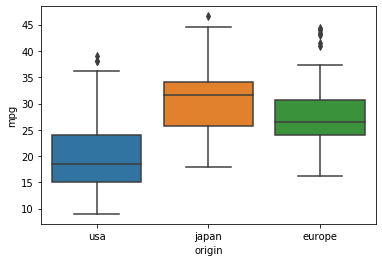

In [28]:
sns.boxplot(x='origin', y='mpg', data=dfmpg)

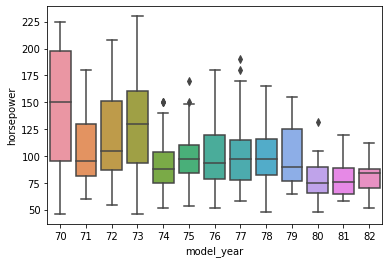

In [29]:
sns.boxplot(x='model_year', y='horsepower', data=dfmpg)

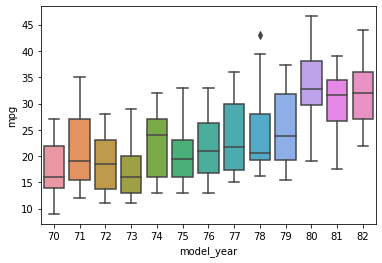

In [30]:
sns.boxplot(x='model_year', y='mpg', data=dfmpg)

In [31]:
origin.mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [33]:
model_year_mean = dfmpg.groupby('model_year').mean()
model_year_mean

,mpg,cylinders,displacement,horsepower,weight,acceleration
model_year,,,,,,
70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276
71,21.250000,5.571429,209.750000,107.037037,2995.428571,15.142857
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500
74,22.703704,5.259259,171.740741,94.230769,2877.925926,16.203704
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556


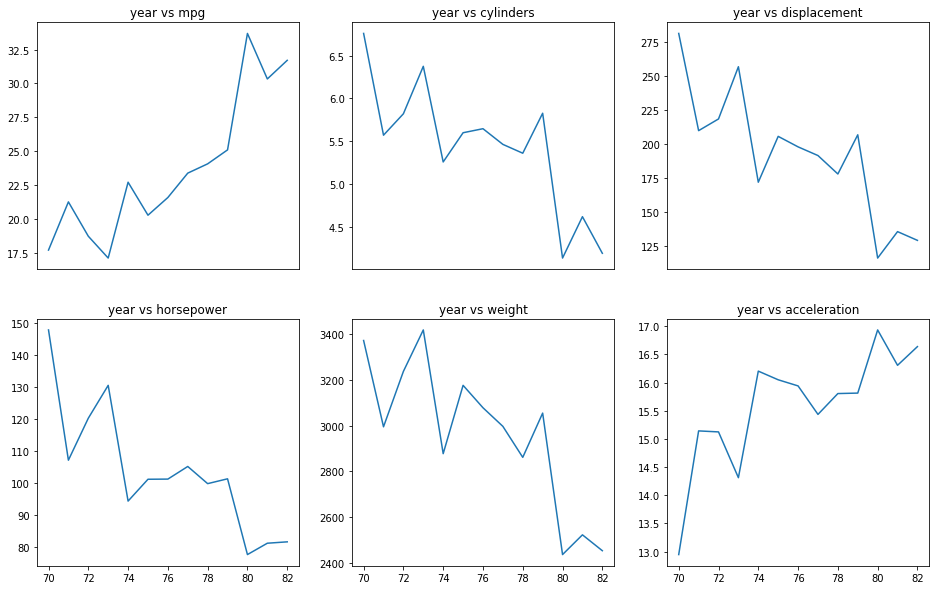

In [40]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.title('year vs mpg')
plt.plot(model_year_mean.index, model_year_mean['mpg'])
plt.xticks([])

plt.subplot(232)
plt.title('year vs cylinders')
plt.plot(model_year_mean.index, model_year_mean['cylinders'])
plt.xticks([])

plt.subplot(233)
plt.title('year vs displacement')
plt.plot(model_year_mean.index, model_year_mean['displacement'])
plt.xticks([])

plt.subplot(234)
plt.title('year vs horsepower')
plt.plot(model_year_mean.index, model_year_mean['horsepower'])

plt.subplot(235)
plt.title('year vs weight')
plt.plot(model_year_mean.index, model_year_mean['weight'])

plt.subplot(236)
plt.title('year vs acceleration')
plt.plot(model_year_mean.index, model_year_mean['acceleration'])


plt.show()

In [45]:
dfnul = pd.DataFrame({'nan':dfmpg.isna().sum(), '%':dfmpg.isna().sum()/len(dfmpg)*100}, index=dfmpg.isna().sum().index)
dfnul


,nan,%
mpg,0,0.000000
cylinders,0,0.000000
displacement,0,0.000000
horsepower,6,1.507538
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
name,0,0.000000


In [46]:
dfNull = dfmpg[dfmpg.horsepower.isna()].copy()
dfNull

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [47]:
def isi_horsepower(cols):
    hp = cols[0]
    my = cols[1]
    ori = cols[2]
    cyl = cols[3]
    
    if pd.isnull(hp):
        return (dfmpg[dfmpg['cylinders']==cyl]['horsepower'].mean() + dfmpg[dfmpg['model_year']==my]['horsepower'].mean()
                + dfmpg[dfmpg['origin']==ori]['horsepower'].mean()) / 3
    else:
        return hp

In [48]:
dfmpg['horsepower'] = dfmpg[['horsepower', 'model_year', 'origin', 'cylinders']].apply(isi_horsepower,axis=1)
dfmpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [49]:
dfNull['horsepower'] = dfNull[['horsepower', 'model_year', 'origin', 'cylinders']].apply(isi_horsepower,axis=1)
dfNull

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,101.362328,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,104.960088,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,79.026849,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,91.754102,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,80.022031,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,93.028601,3035,20.5,82,usa,amc concord dl


In [51]:
dfmpg['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

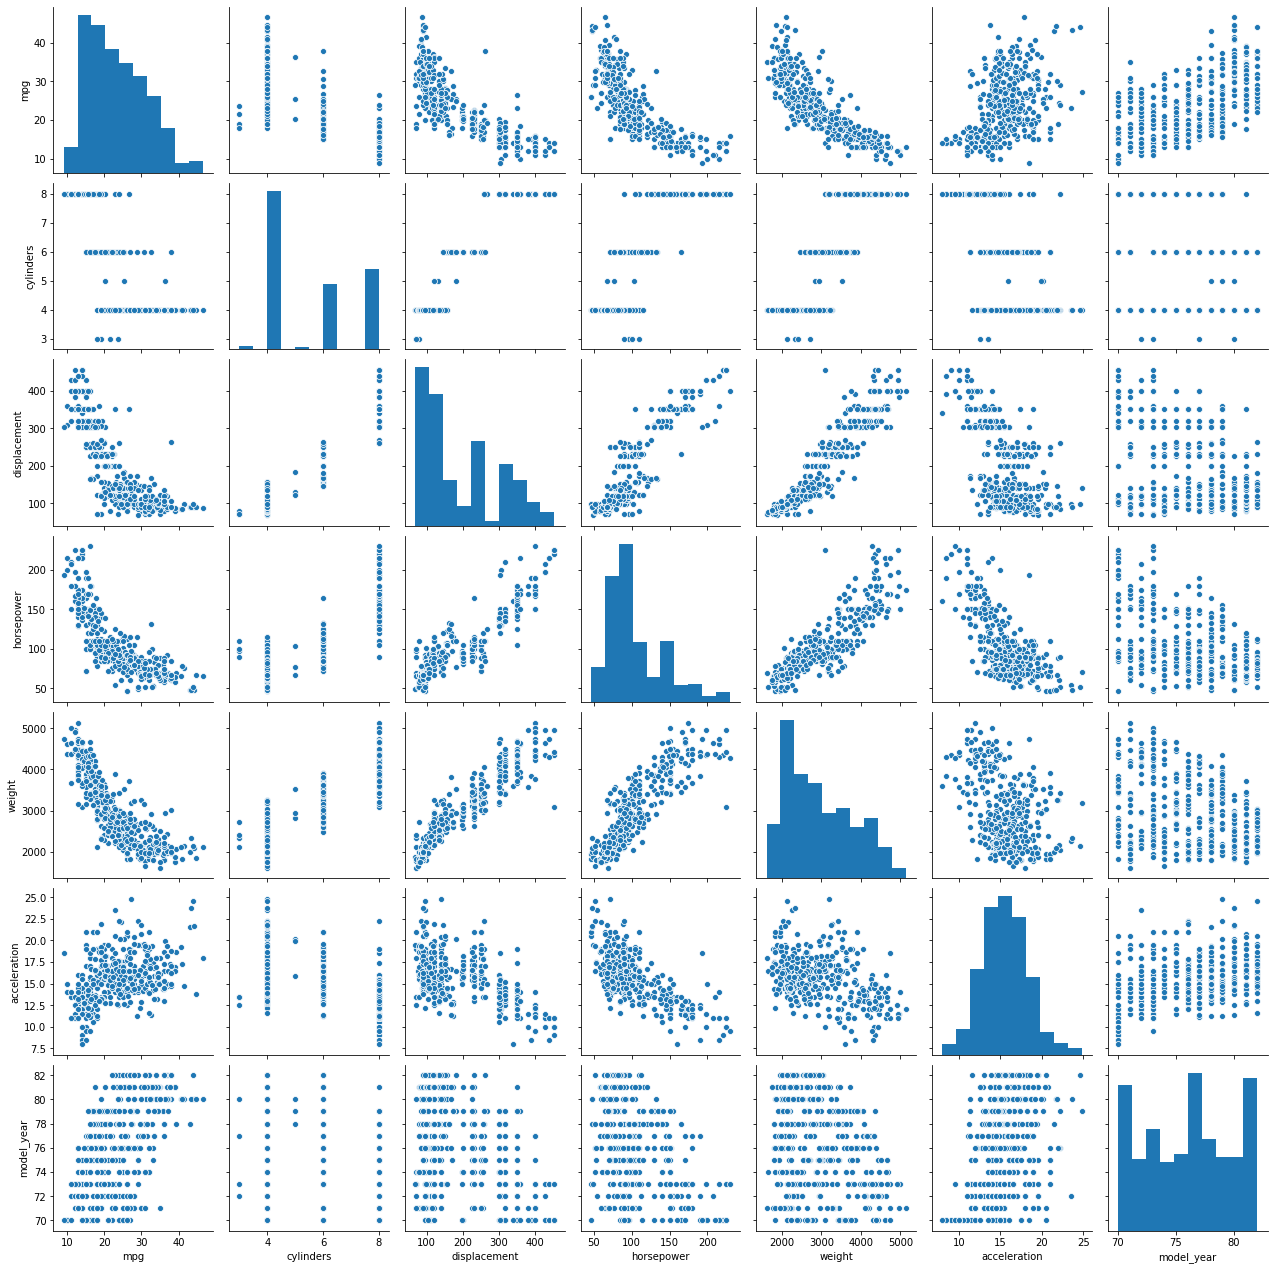

In [50]:
sns.pairplot(dfmpg)

In [52]:
def correlation_ratio(categories, measurements):
    
    def convert(data, to):
        converted = None
        if to == 'array':
            if isinstance(data, np.ndarray):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values
            elif isinstance(data, list):
                converted = np.array(data)
            elif isinstance(data, pd.DataFrame):
                converted = data.as_matrix()
        elif to == 'list':
            if isinstance(data, list):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values.tolist()
            elif isinstance(data, np.ndarray):
                converted = data.tolist()
        elif to == 'dataframe':
            if isinstance(data, pd.DataFrame):
                converted = data
            elif isinstance(data, np.ndarray):
                converted = pd.DataFrame(data)
        else:
            raise ValueError("Unknown data conversion: {}".format(to))
        if converted is None:
            raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
        else:
            return converted
        
    categories = convert(categories, 'array')
    measurements = convert(measurements, 'array')
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [53]:
dfmpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [54]:
correlation_ratio(dfmpg['origin'], dfmpg['mpg'])

0.332864469155323

In [57]:
correlation_ratio(dfmpg['name'], dfmpg['mpg'])

0.9675598164519239

In [58]:
dfmpg['name'].value_counts()

ford pinto                     6
ford maverick                  5
toyota corolla                 5
amc matador                    5
chevrolet chevette             4
                              ..
mazda glc                      1
chevrolet woody                1
dodge colt hatchback custom    1
honda civic (auto)             1
dodge diplomat                 1
Name: name, Length: 305, dtype: int64

## Feature Selection / Feature Engineering / Feature Extraction

In [55]:
copy = dfmpg.copy()

In [61]:
dfmpg.drop('name', axis=1, inplace=True)

In [62]:
dfmpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [69]:
cylinder = pd.get_dummies(dfmpg['cylinders'])
modelyear = pd.get_dummies(dfmpg['model_year'])
origin = pd.get_dummies(dfmpg['origin'])
dfmpg.drop(['cylinders', 'model_year', 'origin'],inplace=True,axis=1)
dfmpg = pd.concat([dfmpg,cylinder,modelyear,origin], axis=1)

KeyError: 'cylinders'

In [72]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [73]:
dfmpg

,mpg,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
0,18.0,307.0,130.0,3504,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,15.0,350.0,165.0,3693,11.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,18.0,318.0,150.0,3436,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,16.0,304.0,150.0,3433,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17.0,302.0,140.0,3449,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
394,44.0,97.0,52.0,2130,24.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
395,32.0,135.0,84.0,2295,11.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
396,28.0,120.0,79.0,2625,18.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## Modelling

In [74]:
X = dfmpg.drop('mpg', axis=1)
y = dfmpg['mpg']

In [75]:
X

,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
0,307.0,130.0,3504,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,350.0,165.0,3693,11.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,318.0,150.0,3436,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,304.0,150.0,3433,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,302.0,140.0,3449,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,140.0,86.0,2790,15.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
394,97.0,52.0,2130,24.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
395,135.0,84.0,2295,11.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
396,120.0,79.0,2625,18.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [76]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train

,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
303,85.0,65.0,2020,19.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
347,85.0,65.0,1975,19.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
149,120.0,97.0,2489,15.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
100,250.0,88.0,3021,16.5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
175,90.0,70.0,1937,14.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,112.0,88.0,2395,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
320,119.0,92.0,2434,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15,198.0,95.0,2833,15.5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
125,198.0,95.0,3102,16.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [84]:
y_train

303    31.8
347    37.0
149    24.0
100    18.0
175    29.0
       ... 
369    34.0
320    37.0
15     22.0
125    20.0
265    17.5
Name: mpg, Length: 318, dtype: float64

In [85]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
X.columns

Index(['displacement',   'horsepower',       'weight', 'acceleration',
                    3,              4,              5,              6,
                    8,             70,             71,             72,
                   73,             74,             75,             76,
                   77,             78,             79,             80,
                   81,             82,       'europe',        'japan',
                'usa'],
      dtype='object')

In [88]:
coeff_lm = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficients'])
coeff_lm

,Coefficients
displacement,0.014438
horsepower,-0.033762
weight,-0.005943
acceleration,0.030567
3,-5.079387
...,...
81,3.656312
82,5.545093
europe,0.421893
japan,0.944620


In [89]:
print(lm.intercept_)

41.59671657059755


In [90]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Y Predictions')

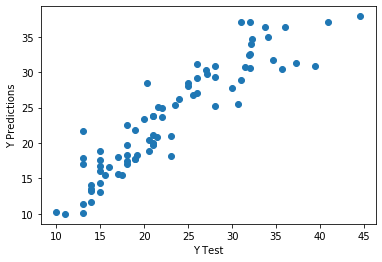

In [91]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Y Predictions')

In [92]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 2.4454363120311813
MSE: 9.788440994165873
RMSE: 3.1286484293007217
R2: 0.8399404587644689


In [94]:
def evaluation(model, xtest, ytest):
    predictions = model.predict(xtest)
    eval_dict = {}
    eval_dict['MAE'] = mean_absolute_error(ytest, predictions)
    eval_dict['MSE'] = mean_squared_error(ytest, predictions)
    eval_dict['RMSE'] = np.sqrt(mean_squared_error(ytest, predictions))
    eval_dict['R2'] = r2_score(ytest, predictions)
    print(eval_dict)
    
    return eval_dict

In [95]:
eval_lm = evaluation(lm, X_test, y_test)

{'MAE': 2.4454363120311813, 'MSE': 9.788440994165873, 'RMSE': 3.1286484293007217, 'R2': 0.8399404587644689}


In [100]:
eval_lm_train = evaluation(lm, X_train, y_train)

{'MAE': 2.0557930019949535, 'MSE': 7.481394187688833, 'RMSE': 2.7352137371124825, 'R2': 0.8769765183661761}


In [101]:
eval_df = pd.DataFrame({'MAE':[eval_lm['MAE'], eval_lm_train['MAE']], 'MSE':[eval_lm['MSE'], eval_lm_train['MSE']],
                        'RMSE':[eval_lm['RMSE'], eval_lm_train['RMSE']], 'R2':[eval_lm['R2'], eval_lm_train['R2']]}, index=['LinearModel1_test', 'LinearModel1_train'])
eval_df

,MAE,MSE,RMSE,R2
LinearModel1_test,2.445436,9.788441,3.128648,0.839940
LinearModel1_train,2.055793,7.481394,2.735214,0.876977


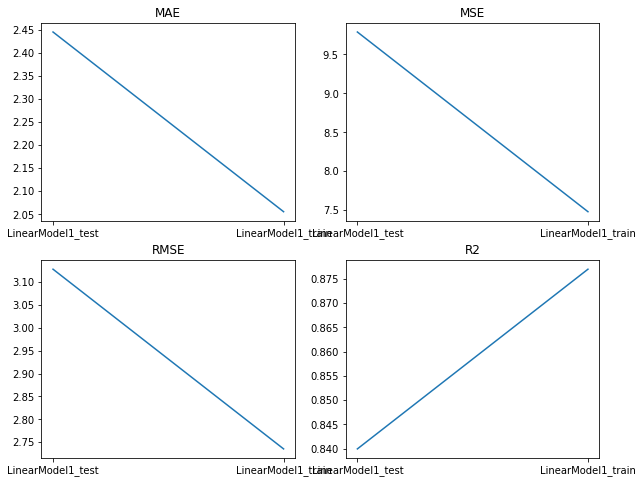

In [104]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.title('MAE')
plt.plot(eval_df.index, eval_df['MAE'])
plt.subplot(222)
plt.title('MSE')
plt.plot(eval_df.index, eval_df['MSE'])
plt.subplot(223)
plt.title('RMSE')
plt.plot(eval_df.index, eval_df['RMSE'])
plt.subplot(224)
plt.title('R2')
plt.plot(eval_df.index, eval_df['R2'])

## Perbandingan

In [105]:
copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [106]:
copy.drop('name', axis=1, inplace=True)
copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [107]:
copy = pd.get_dummies(copy)
copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [108]:
X2 = copy.drop('mpg', axis=1)
y2 = copy['mpg']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=10)
X2_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
303,4,85.0,65.0,2020,19.2,79,0,1,0
347,4,85.0,65.0,1975,19.4,81,0,1,0
149,4,120.0,97.0,2489,15.0,74,0,1,0
100,6,250.0,88.0,3021,16.5,73,0,0,1
175,4,90.0,70.0,1937,14.0,75,1,0,0
...,...,...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395,18.0,82,0,0,1
320,4,119.0,92.0,2434,15.0,80,0,1,0
15,6,198.0,95.0,2833,15.5,70,0,0,1
125,6,198.0,95.0,3102,16.5,74,0,0,1


In [109]:
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
coeff_lm2 = pd.DataFrame(lm2.coef_, index=X2.columns, columns=['Coefficient'])
coeff_lm2

,Coefficient
cylinders,-0.406545
displacement,0.024488
horsepower,-0.015521
weight,-0.007069
acceleration,0.098379
model_year,0.793117
origin_europe,0.900448
origin_japan,1.013141
origin_usa,-1.913589


In [112]:
coeff_lm

,Coefficients
displacement,0.014438
horsepower,-0.033762
weight,-0.005943
acceleration,0.030567
3,-5.079387
...,...
81,3.656312
82,5.545093
europe,0.421893
japan,0.944620


In [113]:
eval_lm2 = evaluation(lm2, X2_test, y2_test)

{'MAE': 2.8727236158390306, 'MSE': 12.387579055482444, 'RMSE': 3.519599274844005, 'R2': 0.7974396309053549}


In [114]:
eval_df = pd.DataFrame({'MAE':[eval_lm['MAE'], eval_lm_train['MAE'], eval_lm2['MAE']],
                        'MSE':[eval_lm['MSE'], eval_lm_train['MSE'], eval_lm2['MSE']],
                        'RMSE':[eval_lm['RMSE'], eval_lm_train['RMSE'], eval_lm2['RMSE']],
                        'R2':[eval_lm['R2'], eval_lm_train['R2'], eval_lm2['R2']]},
                       index=['LinearModel1_test', 'LinearModel1_train', 'LinearModel2_test'])
eval_df

,MAE,MSE,RMSE,R2
LinearModel1_test,2.445436,9.788441,3.128648,0.839940
LinearModel1_train,2.055793,7.481394,2.735214,0.876977
LinearModel2_test,2.872724,12.387579,3.519599,0.797440


([0, 1, 2], <a list of 3 Text xticklabel objects>)

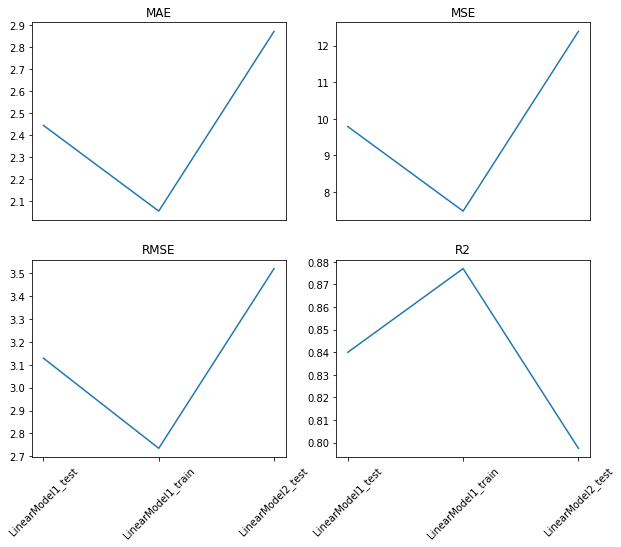

In [117]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.title('MAE')
plt.plot(eval_df.index, eval_df['MAE'])
plt.xticks([])
plt.subplot(222)
plt.title('MSE')
plt.plot(eval_df.index, eval_df['MSE'])
plt.xticks([])
plt.subplot(223)
plt.title('RMSE')
plt.plot(eval_df.index, eval_df['RMSE'])
plt.xticks(rotation=45)
plt.subplot(224)
plt.title('R2')
plt.plot(eval_df.index, eval_df['R2'])
plt.xticks(rotation=45)

Dari data plot di atas, dapat saya simpulkan bahwa, model yang ditrain menggunakan data yang `cylinder`, `year_model`, `origin` dijadikan dummy variable itu lebih baik hasilnya daripada model ke-2

In [118]:
dfmpg

,mpg,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
0,18.0,307.0,130.0,3504,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,15.0,350.0,165.0,3693,11.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,18.0,318.0,150.0,3436,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,16.0,304.0,150.0,3433,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17.0,302.0,140.0,3449,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
394,44.0,97.0,52.0,2130,24.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
395,32.0,135.0,84.0,2295,11.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
396,28.0,120.0,79.0,2625,18.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [120]:
from sklearn.linear_model import Ridge, Lasso
rm = Ridge(alpha=0.1)
rm.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [121]:
rm_coef = pd.DataFrame(rm.coef_, index=X.columns, columns=['Coefficient'])
rm_coef

,Coefficient
displacement,0.014658
horsepower,-0.034277
weight,-0.005931
acceleration,0.031185
3,-4.870594
...,...
81,3.637394
82,5.517026
europe,0.424492
japan,0.942592


In [122]:
eval_rm = evaluation(rm, X_test, y_test)
eval_rm

{'MAE': 2.4422171507485806, 'MSE': 9.738933114649287, 'RMSE': 3.1207263761261235, 'R2': 0.8407500063203761}


{'MAE': 2.4422171507485806,
 'MSE': 9.738933114649287,
 'RMSE': 3.1207263761261235,
 'R2': 0.8407500063203761}

In [123]:
eval_df = pd.DataFrame({'MAE':[eval_lm['MAE'],eval_rm['MAE']],
                        'MSE':[eval_lm['MSE'], eval_rm['MSE']],
                        'RMSE':[eval_lm['RMSE'], eval_rm['RMSE']],
                        'R2':[eval_lm['R2'],eval_rm['R2']]},
                       index=['LinearModel1_test', 'Ridge1_test'])
eval_df

,MAE,MSE,RMSE,R2
LinearModel1_test,2.445436,9.788441,3.128648,0.83994
Ridge1_test,2.442217,9.738933,3.120726,0.84075


## Production

In [124]:
rm

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [125]:
X_train

,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
303,85.0,65.0,2020,19.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
347,85.0,65.0,1975,19.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
149,120.0,97.0,2489,15.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
100,250.0,88.0,3021,16.5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
175,90.0,70.0,1937,14.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,112.0,88.0,2395,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
320,119.0,92.0,2434,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15,198.0,95.0,2833,15.5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
125,198.0,95.0,3102,16.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
def mpg_prediction(displacement, horsepower, weigth, accel, cyl3, cyl4, cyl5, cyl6, cyl8, yr70, yr71, yr72, yr73)